Author: JIL HARRY ALGABRE

# Task 3 - Exploratory Data Analysis - Retail
(Level - Beginner)

Project: SPARKS Foundation: Graduate Rotational Internship Program(GRIP)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [4]:
df0 = pd.read_csv('E:/Datasets/SampleSuperstore.csv')

# 0. OBJECTIVES

A. Determine Weak Areas

B. Determine Business Problems

# 1. Understanding the Data

In [6]:
df0.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df0.describe()  #negative profit (loss)

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df0.info() #correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df0.columns #no misplaced whitespace

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df0.shape

(9994, 13)

In [11]:
df0.isnull().sum() #no missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# 2. Overview

In [13]:
df_num = df0[['Sales','Quantity','Discount','Profit']]

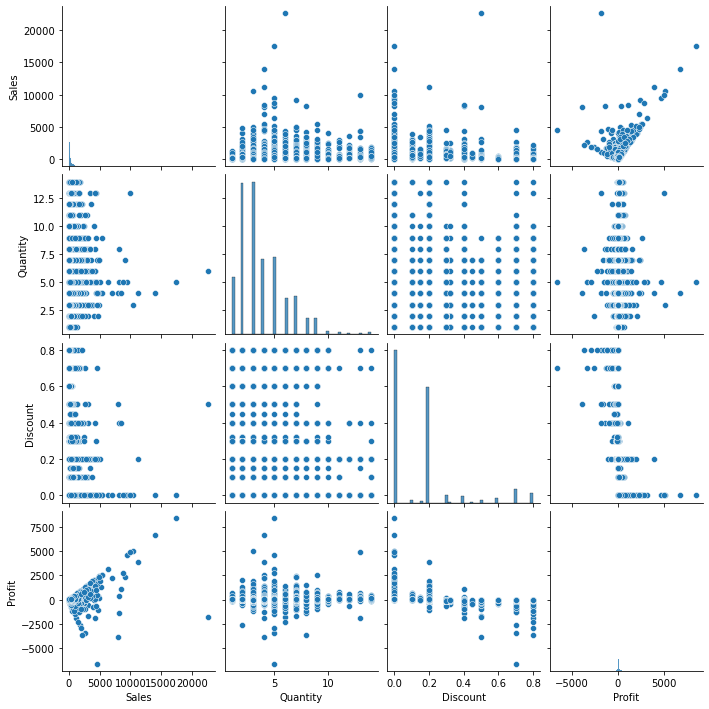

In [14]:
sns.pairplot(df_num)

<AxesSubplot:xlabel='Profit', ylabel='Discount'>

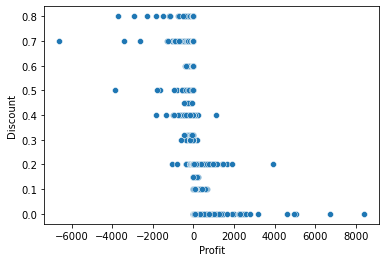

In [17]:
sns.scatterplot(data=df_num,x='Profit',y='Discount')

# 3. DETERMINING WEAK AREAS

In [11]:
df1 = df0[['City','State','Category','Sub-Category','Sales','Quantity','Discount','Profit']]

# A. State Level

In [12]:
df_state = df1.groupby(['State']).mean()
df_state = df_state.reset_index()

# i. Profit

<AxesSubplot:title={'center':'States with Least Mean Profit'}, xlabel='State'>

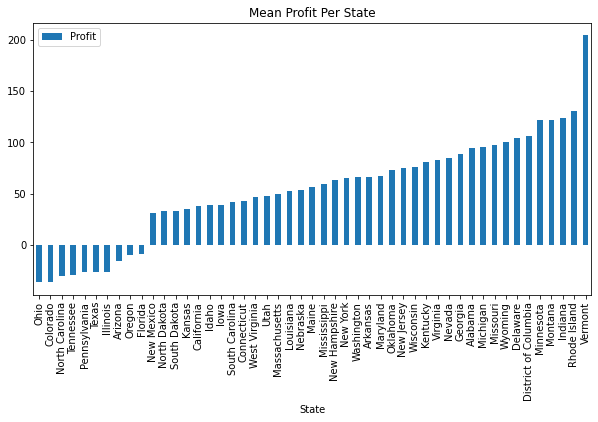

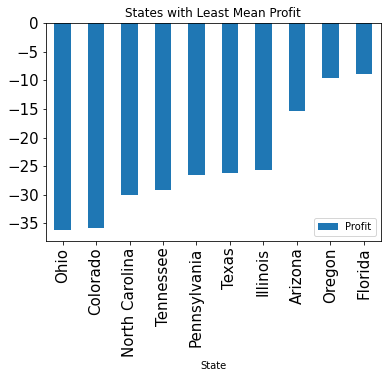

In [55]:
#I. Mean Profit per State
df_state_profit = df_state.sort_values(by='Profit')
df_state_profit.plot(x='State',y='Profit',kind='bar',figsize=(10,5), title='Mean Profit Per State')

#TOP 10 Least mean profit per state
df_state_profit10 = df_state.sort_values(by='Profit')[:10]
df_state_profit10.plot(x='State',y='Profit',kind='bar',fontsize=(15),title='States with Least Mean Profit')

# ii. Sales

<AxesSubplot:title={'center':'States with Least Mean Sales'}, xlabel='State'>

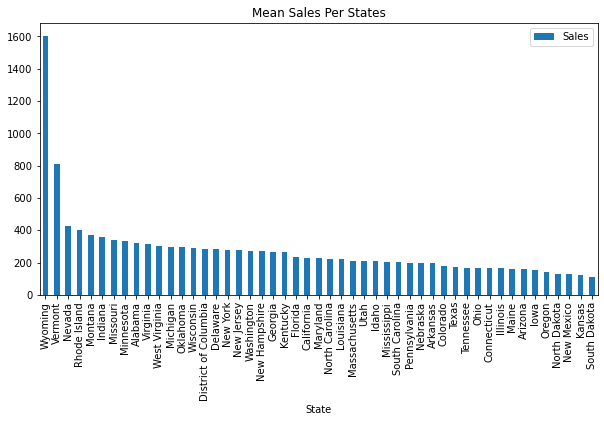

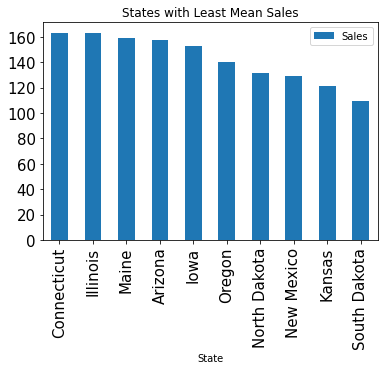

In [53]:
#II. Sales Per State
df_state_sales = df_state.sort_values(by='Sales',ascending=False)
df_state_sales.plot(x='State',y='Sales',kind='bar',figsize=(10,5),title='Mean Sales Per States')
    
# TOP 10 Least Mean Sales
df_state_sales = df_state.sort_values(by='Sales',ascending=False)[-10:]
df_state_sales.plot(x='State',y='Sales',kind='bar',fontsize=(15), title='States with Least Mean Sales')

# iii. Quantity Sold

<AxesSubplot:title={'center':'States with Least  Mean Quantity Sold'}, xlabel='State'>

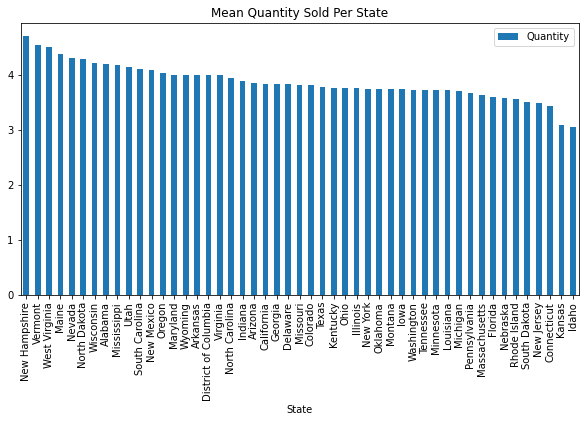

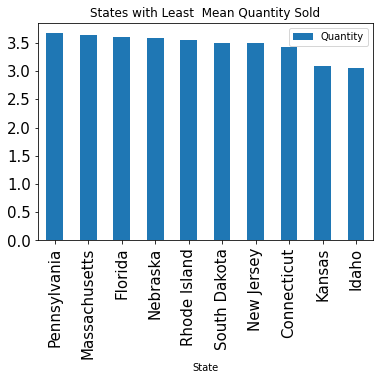

In [52]:
#III. Least Quantity
df_state_quantity = df_state.sort_values(by='Quantity',ascending=False)
df_state_quantity.plot(x='State',y='Quantity',kind='bar',figsize=(10,5),title='Mean Quantity Sold Per State')

#   III. Least Quantity
df_state_quantity = df_state.sort_values(by='Quantity',ascending=False)[-10:]
df_state_quantity.plot(x='State',y='Quantity',kind='bar',fontsize=(15),title='States with Least  Mean Quantity Sold')

# B. CITY LEVEL

In [57]:
df_city = df1.groupby(['City']).mean()
df_city = df_city.reset_index()

# i. Quantity

<AxesSubplot:title={'center':'Cities with Least Mean Quantity Sold'}, xlabel='City'>

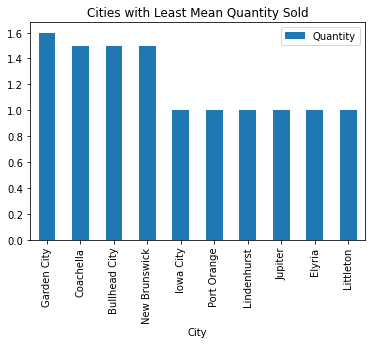

In [63]:
#TOP 10 Cities With Least Mean Quantity Sold
df_city_quantity = df_city.sort_values(by='Quantity',ascending=False)[-10:]
df_city_quantity.plot(x='City',y='Quantity',kind='bar',title='Cities with Least Mean Quantity Sold')

# ii. Sales

<AxesSubplot:title={'center':'Cities with Least Mean Sales'}, xlabel='City'>

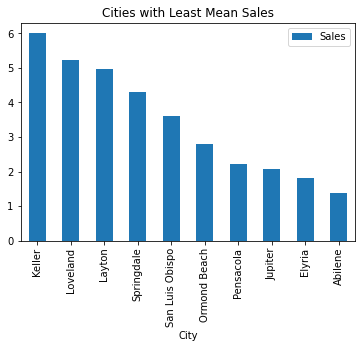

In [65]:
#TOP 10 Cities with Least Mean Sales
df_city_sales = df_city.sort_values(by='Sales',ascending=False)[-10:]
df_city_sales.plot(x='City',y='Sales',kind='bar',title='Cities with Least Mean Sales')

# iii. Profit

<AxesSubplot:title={'center':'Cities With LEAST Mean Profit'}, xlabel='City'>

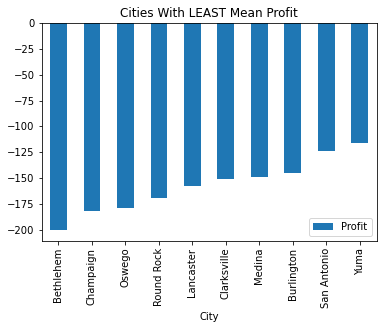

In [66]:
#TOP 10 Cites with Least Mean Profit
df_city_profit = df_city.sort_values(by='Profit')[:10]
df_city_profit.plot(x='City',y='Profit',kind='bar',title='Cities With LEAST Mean Profit')

# C. Category Level

<AxesSubplot:title={'center':'Mean Discount per Category'}, xlabel='Category'>

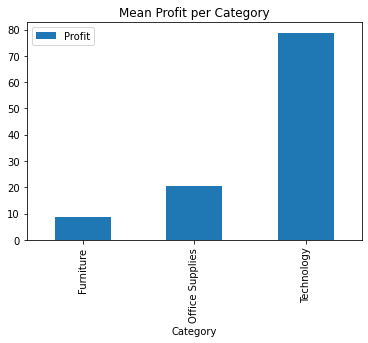

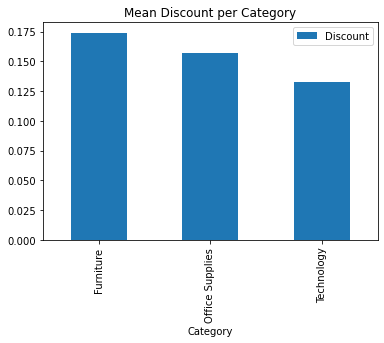

In [19]:
df2 = df0[['Ship Mode', 'Segment', 'Category','Sub-Category','Sales','Quantity','Discount','Profit']]

df_category = df2.groupby(['Category']).mean()
df_category = df_category.reset_index()
df_cat_prof = df_category.sort_values(by='Profit')
df_cat_prof.plot(x='Category', y='Profit', kind='bar', title='Mean Profit per Category')

df_cat_disc = df_category.sort_values(by='Discount')
df_cat_prof.plot(x='Category', y='Discount', kind='bar',title='Mean Discount per Category')

# D. Sub-Category Level

<AxesSubplot:title={'center':'Mean Discount per Sub-Category'}, xlabel='Sub-Category'>

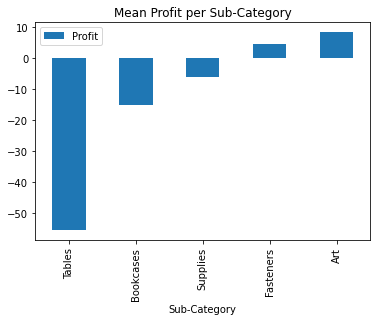

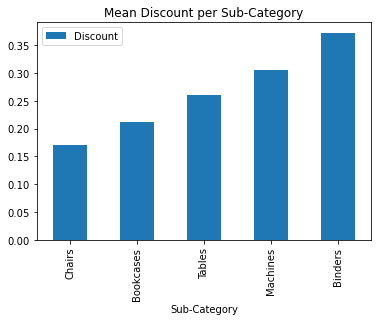

In [75]:
df_subcat = df2.groupby(['Sub-Category']).mean()
df_subcat = df_subcat.reset_index()
df_subcat_prof = df_subcat.sort_values(by='Profit')[:5]
df_subcat_prof.plot(x='Sub-Category', y='Profit', kind='bar', title='Mean Profit per Sub-Category')

df_subcat_disc = df_subcat.sort_values(by='Discount')[-5:]
df_subcat_disc.plot(x='Sub-Category', y='Discount', kind='bar', title='Mean Discount per Sub-Category')

# E. Segment Level

<AxesSubplot:title={'center':'Mean Profit per Segment'}, xlabel='Segment'>

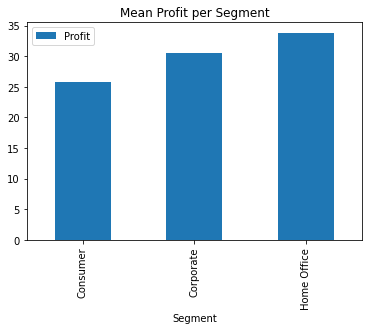

In [77]:
df_segment = df2.groupby(['Segment']).mean()
df_segment = df_segment.reset_index()
df_seg_prof = df_segment.sort_values(by='Profit')
df_seg_prof.plot(x='Segment',y='Profit',kind='bar',title='Mean Profit per Segment')

# F. Ship Mode

<AxesSubplot:title={'center':'Mean Profit per Ship Mode'}, xlabel='Ship Mode'>

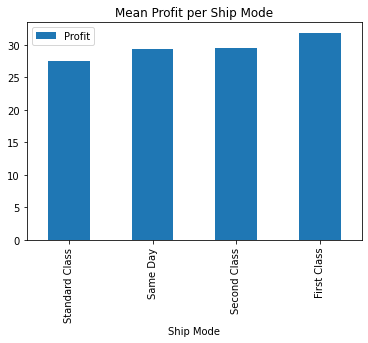

In [78]:
df_shipmode = df2.groupby(['Ship Mode']).mean()
df_shipmode = df_shipmode.reset_index()
df_ship_prof = df_shipmode.sort_values(by='Profit')
df_ship_prof.plot(x='Ship Mode',y='Profit',kind='bar',title='Mean Profit per Ship Mode')